In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/umang datasets/bipolar.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,How often do you experience periods of extreme energy or euphoria?,Do you find that your mood changes rapidly throughout the day?,How frequently do you engage in risky behaviors when feeling high-spirited?,"When you're feeling down, how often do you lose interest in activities?",Do you feel unusually irritable or agitated during mood swings?,How often do you sleep very little without feeling tired?,"When you're in a good mood, how often do you talk more than usual?",Do you notice any changes in your appetite during mood episodes?,How often do you feel a sense of hopelessness during low periods?,Do you have difficulty concentrating when your mood shifts?,Final Score
0,2,1,0,0,4,3,2,3,1,0,41.693291
1,3,2,1,2,3,3,1,2,3,4,57.220447
2,1,2,2,1,4,4,1,4,3,2,50.894569
3,4,1,4,2,3,1,0,3,1,0,54.345048
4,3,1,3,0,0,1,3,1,1,4,46.293930


In [ ]:
df.describe()

,How often do you experience periods of extreme energy or euphoria?,Do you find that your mood changes rapidly throughout the day?,How frequently do you engage in risky behaviors when feeling high-spirited?,"When you're feeling down, how often do you lose interest in activities?",Do you feel unusually irritable or agitated during mood swings?,How often do you sleep very little without feeling tired?,"When you're in a good mood, how often do you talk more than usual?",Do you notice any changes in your appetite during mood episodes?,How often do you feel a sense of hopelessness during low periods?,Do you have difficulty concentrating when your mood shifts?,Final Score
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,2.406750,2.400500,2.398000,2.420000,2.405500,2.432750,2.427000,2.408750,2.43875,2.416000,58.685895
std,1.299703,1.296542,1.303273,1.291517,1.273372,1.275102,1.288831,1.294833,1.27658,1.296289,12.957972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,14.376997
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,49.456869
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,58.658147
75%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000,67.859425
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,90.000000


In [ ]:
col_name = 0
for col in df.columns:
    df.rename(columns={col: str(col_name)}, inplace=True)
    col_name += 1


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2,1,0,0,4,3,2,3,1,0,41.693291
1,3,2,1,2,3,3,1,2,3,4,57.220447
2,1,2,2,1,4,4,1,4,3,2,50.894569
3,4,1,4,2,3,1,0,3,1,0,54.345048
4,3,1,3,0,0,1,3,1,1,4,46.293930


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df.drop('10', axis=1)
y = df['10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')


MAE: 4.1826919785486085, MSE: 25.23797223028407, R²: 0.846211128444274


In [ ]:
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,59.233227,58.189457
1,70.159744,65.904153
2,46.581470,48.775399
3,37.955272,46.526837
4,83.961661,78.860703
5,77.923323,80.102875
6,71.884984,64.975399
7,72.460064,64.092652
8,71.597444,69.006709
9,64.408946,62.485304


<Figure size 2400x1200 with 0 Axes>

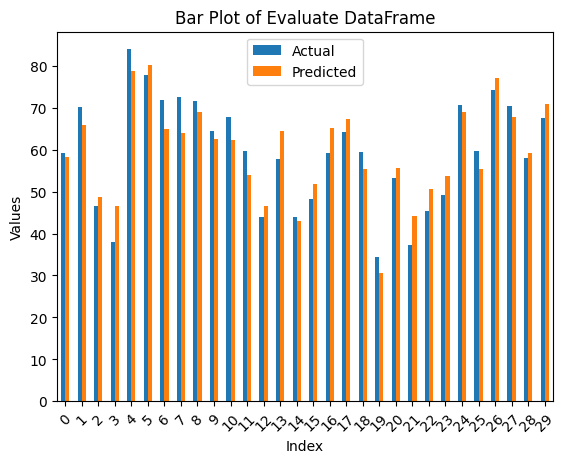

In [ ]:
plt.figure(figsize=(24, 12))
evaluate.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Fitting the training data to our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)


0.9006181854169326

In [ ]:
# predict the y values
y_pred_lin_reg=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate_lin_reg = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred_lin_reg.flatten()})
evaluate_lin_reg.head(10)

,Actual,Predicted
0,59.233227,59.247525
1,70.159744,67.395339
2,46.581470,46.674513
3,37.955272,40.640043
4,83.961661,78.421042
5,77.923323,80.979241
6,71.884984,66.125099
7,72.460064,67.033786
8,71.597444,66.033227
9,64.408946,61.537573


<Figure size 2400x1200 with 0 Axes>

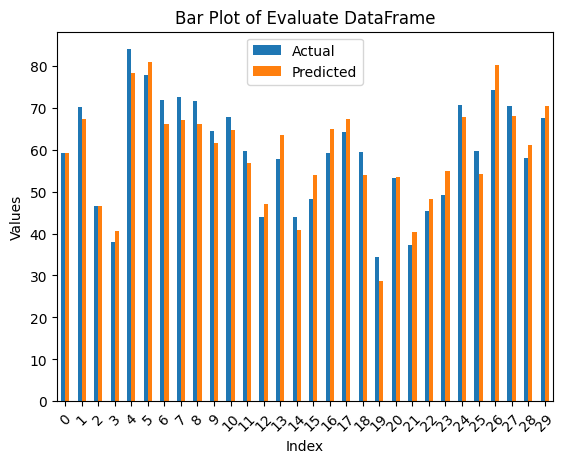

In [ ]:
plt.figure(figsize=(24, 12))
evaluate_lin_reg.head(30).plot(kind='bar')
plt.title('Bar Plot of Evaluate DataFrame')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
with open(f'lin_reg_bipolar_model.pkl', 'wb') as file:
        pickle.dump(regressor, file)

In [ ]:
with open('lin_reg_bipolar_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(np.array([[1,1,2,4,1,2,0,0,1,2]]))
print("Predictions:", predictions)

Predictions: [37.22778977]
